<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### Support Vector Regression(SVR) With Scale And Power Transformer

This Code template is for the Classification task using Support Vector Regression(SVR) based on the Support Vector Machine algorithm with PowerTransformer as Feature Transformation Technique, rescaling technique Scaling in a pipeline

# Required Packages


In [46]:
import warnings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from sklearn.preprocessing import PowerTransformer, scale
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVR 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
warnings.filterwarnings('ignore')

# Initialization

Path for csv file

In [47]:
#filepath
file_path= ""

In [48]:
#x_values
features=[]

In [49]:
#y_value
target=''

# Data fetching
pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [50]:
#read_csv
df=pd.read_csv(file_path)
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Feature Selections
We will assign all the required input features to X and target/outcome to Y.

In [51]:
#Get training and testing dataset 
X=df[features]
Y=df[target]

# Data Preprocessing
Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [52]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [53]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,rm,age,dis,rad,tax,ptratio,black,lstat
0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


# Correlation Map
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

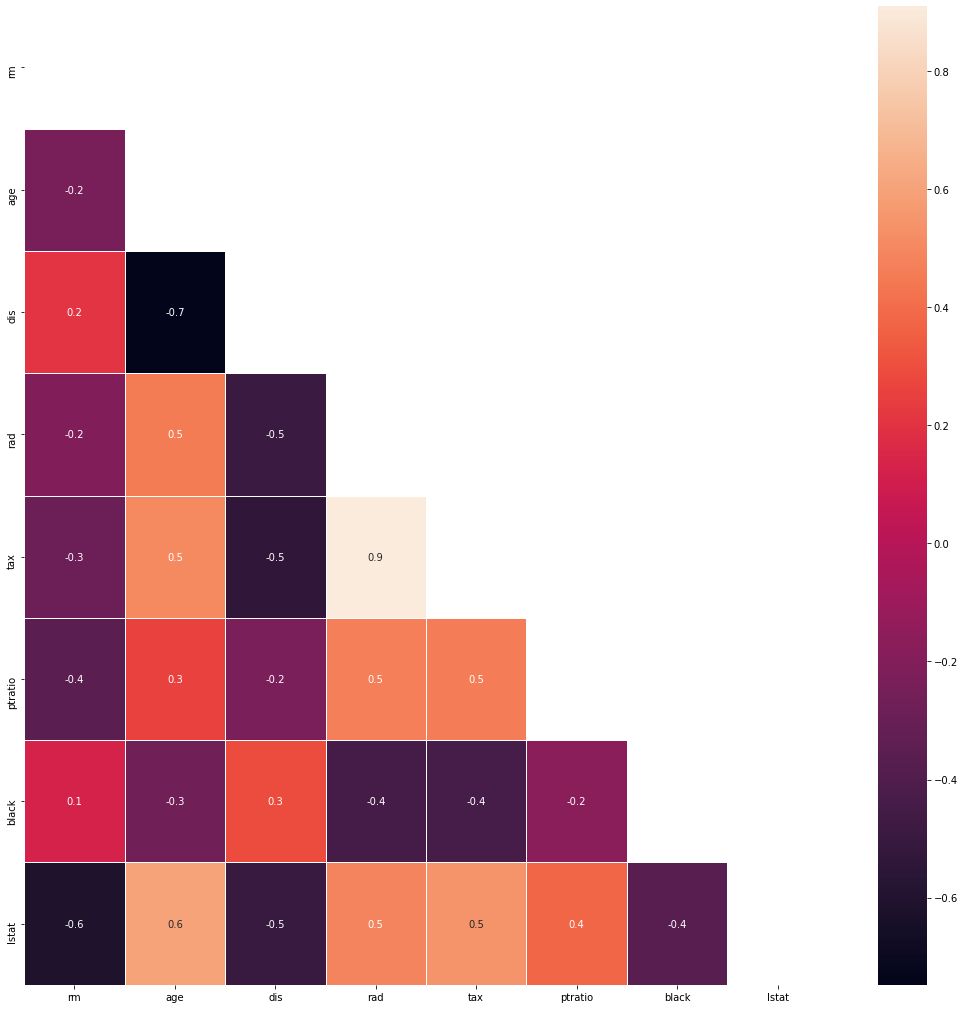

In [54]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

# Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=120)

# Data Scaling
Standardize a dataset along any axis.
Center to the mean and component wise scale to unit variance.

In [56]:
x_train = scale(x_train)
x_test = scale(x_test)

# Model
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other terms, for a given known/labelled data points, the SVM outputs an appropriate hyperplane that classifies the inputted new cases based on the hyperplane. In 2-Dimensional space, this hyperplane is a line separating a plane into two segments where each class or group occupied on either side.

Here we will use SVR, the svr implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and maybe impractical beyond tens of thousands of samples.

### Model Tuning Parameters
1. #### C : float, default=1.0

Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

2. #### kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

3. #### gamma : {‘scale’, ‘auto’} or float, default=’scale’

Gamma is a hyperparameter that we have to set before the training model. Gamma decides how much curvature we want in a decision boundary.

4. #### degree : int, default=3

Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.Using degree 1 is similar to using a linear kernel. Also, increasing degree parameter leads to higher training times.



## Feature Transformation
### PowerTransformer
#### Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

In [57]:
model=make_pipeline(PowerTransformer(),SVR())
model.fit(x_train, y_train)

Pipeline(steps=[('powertransformer', PowerTransformer()), ('svr', SVR())])

# Model Accuracy

In [58]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 60.05 %



### r2_score: 
The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

### mae: 
The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

### mse: 
The mean squared error function squares the error(penalizes the model for large errors) by our model. 

In [59]:
y_pred=model.predict(x_test)
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 60.05 %
Mean Absolute Error 3.51
Mean Squared Error 37.37


### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis. 

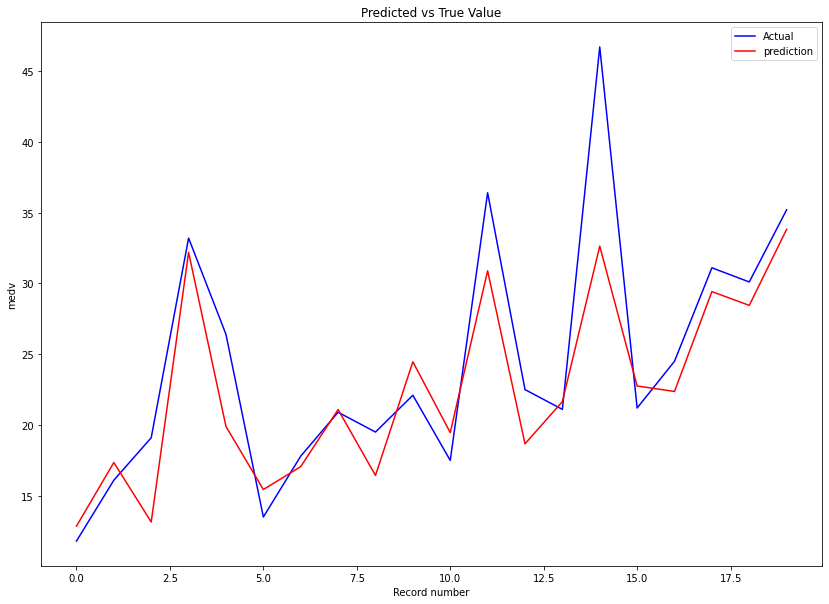

In [61]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "blue")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

# Creator - Prajwal Nimje, Github: [Profile](https://github.com/PrajwalNimje1997)